In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
df = pd.read_csv('online marketing.csv')
df


,Users Reached,Revenue Generate
0,56,20000.0
1,87,56800.0
2,100,78950.0
3,104,45300.0
4,112,50600.0
5,120,12350.0
6,125,45255.0
7,130,76819.0
8,211,63759.0
9,235,210065.0


In [5]:
df['Users Reached']

0       56
1       87
2      100
3      104
4      112
5      120
6      125
7      130
8      211
9      235
10     246
11     246
12     300
13     300
14     302
15     321
16     345
17     350
18     432
19     440
20     450
21     453
22     546
23     560
24     578
25     678
26     686
27     990
28    1787
Name: Users Reached, dtype: int64

In [40]:
q1 = np.quantile(df['Users Reached'] , 0.25)
q1

127.5

In [41]:
q3 = np.quantile(df['Users Reached'], 0.75)
q3

445.0

In [42]:
 iqr = q3 - q1
iqr

317.5

In [43]:
cutoff = iqr*1.5
p_max = q3 + cutoff
p_min = q1 - cutoff

print(cutoff)
print(p_max)
print(p_min)

476.25
921.25
-348.75


In [44]:
print('Data lower =', df['Users Reached'].min())
print('The lower bound value is = q1 =', p_min)
print('The IQR is',iqr)
print('The upper bound value is = q3 =', p_max)
print('Data maximum =', df['Users Reached'].max())
print('Five number summary for Users Reached column')
print('(', df['Users Reached'].min(),',',p_min,',',iqr,',',p_max,',',df['Users Reached'].min(),')')

Data lower = 56
The lower bound value is = q1 = -348.75
The IQR is 317.5
The upper bound value is = q3 = 921.25
Data maximum = 686
Five number summary for Users Reached column
( 56 , -348.75 , 317.5 , 921.25 , 56 )


# Boxplot , histogram , scatterplot Exp 4

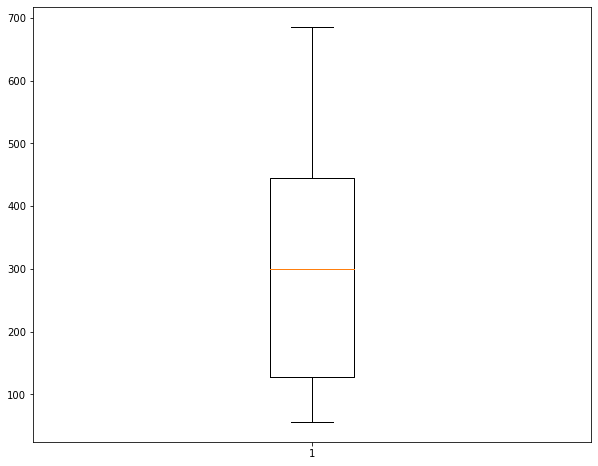

In [38]:
figure = plt.figure(figsize =(10, 8))  
plt.boxplot(df['Users Reached'])  
plt.show()  

In [37]:
pop = df[(df['Users Reached'] >937.5)].index
df.drop(pop , inplace=True)

<AxesSubplot:xlabel='Users Reached', ylabel='Count'>

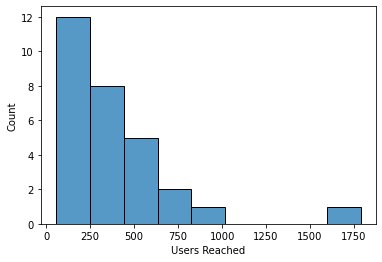

In [51]:
sns.histplot(df['Users Reached'])

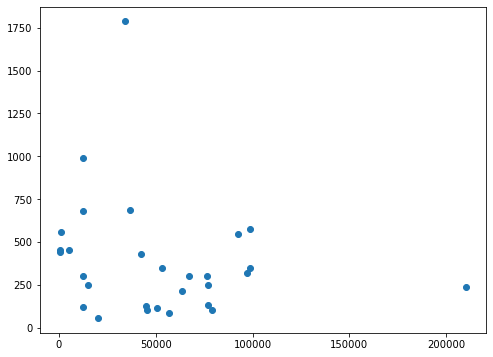

In [61]:
figure = plt.figure(figsize = (8,6))
plt.scatter(x = 'Revenue Generate' , y = 'Users Reached' , data = df)
plt.show()

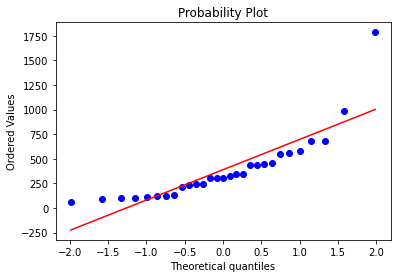

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate sample data
data = df['Users Reached']
# Plot the Q-Q plot
stats.probplot(data, plot=plt)
plt.show()

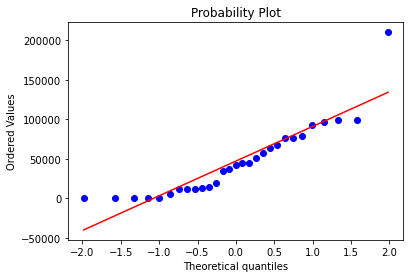

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# Generate sample data
data = df['Revenue Generate']
# Plot the Q-Q plot
stats.probplot(data, plot=plt)
plt.show()

# Filling missing values with mean Exp 3

In [28]:
df['Revenue Generate']

0      20000.0
1      56800.0
2      78950.0
3      45300.0
4      50600.0
5      12350.0
6      45255.0
7      76819.0
8      63759.0
9     210065.0
10     15000.0
11         NaN
12     76580.0
13     12660.0
14     67435.0
15     97179.0
16         NaN
17     98925.0
18     42657.0
19       635.0
20       868.0
21      5247.0
22     92754.0
23       920.0
24     98648.0
25     12366.0
26     36745.0
27     12345.0
28     34356.0
Name: Revenue Generate, dtype: float64

In [30]:
df['Revenue Generate'].isnull().sum()

2

In [6]:
df['Revenue Generate']= df['Revenue Generate'].fillna(df['Users Reached'].mean())

In [7]:
df['Revenue Generate'].isnull().sum()

0

In [47]:
df['Revenue Generate'].head(12)

0      20000.000000
1      56800.000000
2      78950.000000
3      45300.000000
4      50600.000000
5      12350.000000
6      45255.000000
7      76819.000000
8      63759.000000
9     210065.000000
10     15000.000000
11       389.310345
Name: Revenue Generate, dtype: float64

# Binning Methods

In [40]:
# binning for equal width
def equiwidth(arr1, m):
    a = len(arr1)
    w = int((max(arr1) - min(arr1)) / m)
    min1 = min(arr1)
    arr = []
    for i in range(0, m + 1):
        arr = arr + [min1 + w * i]
    arri=[]
      
    for i in range(0, m):
        temp = []
        for j in arr1:
            if j >= arr[i] and j <= arr[i+1]:
                temp += [j]
        arri += [temp]
    print(arri) 

In [43]:
equiwidth(df['Users Reached'],3)

[[56, 87, 100, 104, 112, 120, 125, 130, 211, 235, 246, 246, 300, 300, 302, 321, 345, 350, 432, 440, 450, 453, 546, 560, 578], [678, 686, 990], [1787]]


In [48]:
#Binning for equal frequency
def equifreq(arr1, m):    
    a = len(arr1)
    n = int(a / m)
    for i in range(0, m):
        arr = []
        for j in range(i * n, (i + 1) * n):
            if j >= a:
                break
            arr = arr + [arr1[j]]
        print(arr)
        
        
equifreq(df['Users Reached'], 4)

[56, 87, 100, 104, 112, 120, 125]
[130, 211, 235, 246, 246, 300, 300]
[302, 321, 345, 350, 432, 440, 450]
[453, 546, 560, 578, 678, 686, 990]
